In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs, PublicPredictor
from src.dbc import utils, TimeDivisionKMeans
from IPython.display import clear_output

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

In [4]:
m_15 = utils.data_preprocessing(xlsx)

df = utils.dimension_reduction(m_15)
m_60 = df.copy()

m_15_1 = m_15[m_15.index.month == 1].copy()
m_60_1 = m_60[m_60.index.month == 1].copy()

## KMeans Setting

In [110]:
from sklearn.metrics import euclidean_distances as euc
from src.KMeans import KMeans

kmeans_1 = KMeans(datas=m_60_1.T.values, ver=1)
kmeans_1.init_setting()

kmeans_2 = KMeans(datas=m_60_1.T.values)
kmeans_2.init_setting()

kmeans_1.fit()
kmeans_2.fit()

# clear_output(wait=True)

# print(kmeans_1.ecv)
# print(kmeans_2.ecv)

ECV : 51 %
ECV : 47 %


In [111]:
print(euc(kmeans_1.clusters_, kmeans_1.clusters_).mean())
print(euc(kmeans_2.clusters_, kmeans_2.clusters_).mean())

13.202968796898888
14.618730749368131


In [112]:
print(np.where(pd.Series(kmeans_1.labels_).value_counts().values == 1)[0].size)
print(np.where(pd.Series(kmeans_2.labels_).value_counts().values == 1)[0].size)

2
4


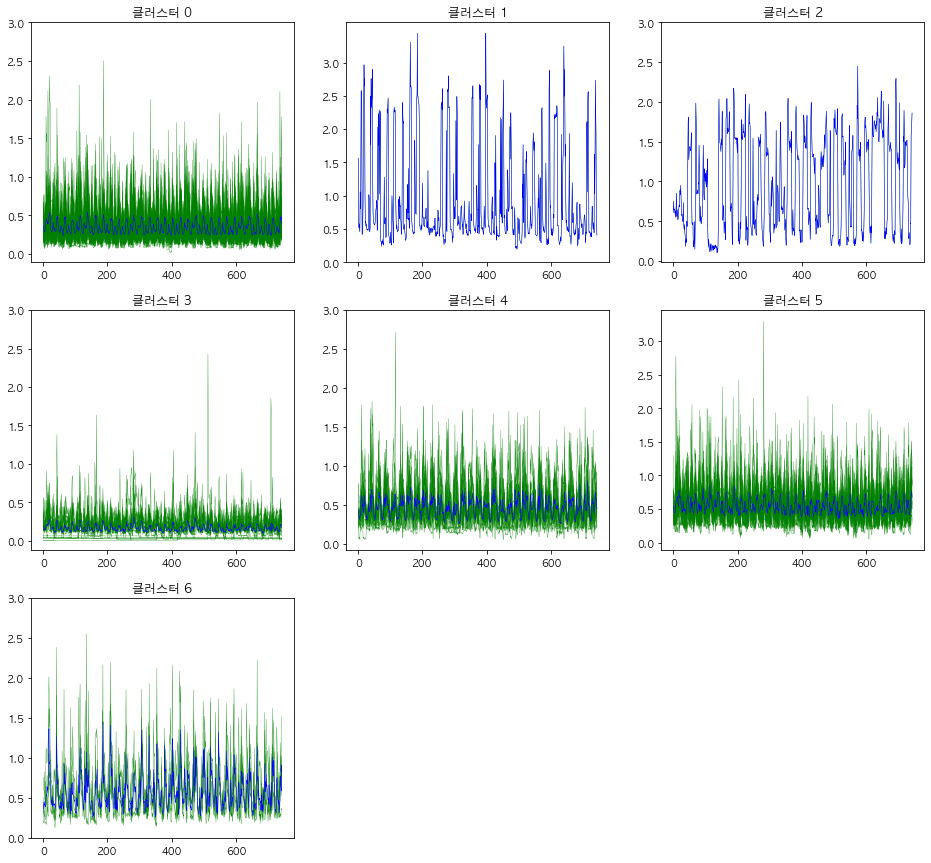

In [113]:
kmeans_1.draw_plot()

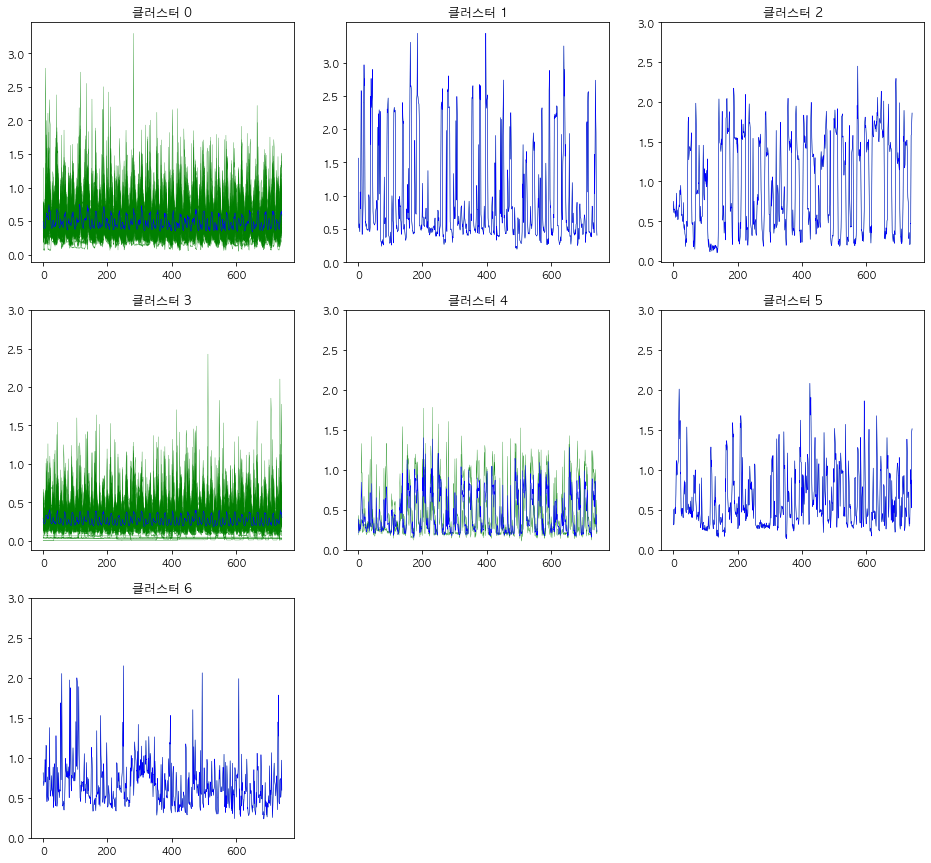

In [114]:
kmeans_2.draw_plot()